# Analysis of 500 $\mu$m excess ($\beta_{cold}$ = 2.0, $T_{warm} =$ Free)

This notebook is meant to upload and take a look at the measured 500 $\mu$m excess using a two temperature modified blackbody to model the 22-500 $\mu$m SED. In this run, I fixed $\beta_{cold} = 2.0$ K and left $T_{warm}$ to be a free parameter. 

First we need to gather all of the 500 $\mu$m excess measurements. For each source, a Python `pickle` file was created that saved a dictionary containing the 500 $\mu$m excess measurements for every modeled SED during the MCMC chain as well as the 2.5, 16, 50, 84, and 97.5 percentiles.

For this run all of the excess .pickle files are stored in ~/Research/Thesis/spire-catalog-analysis/500um-excess/results/beta2_TwarmFree/excess500. The files are named *Name*_beta2_TwarmFree_twotemp_500excess.pickle where *Name* is the name of the source in our catalog. We can grab all of the files using `glob.glob`.

In [52]:
%matplotlib inline

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')
sns.set_style('ticks')
blue, green, red, purple, yellow, cyan = sns.color_palette('deep') # Better colors

# Analysis packages
import numpy as np
import pandas as pd
import pickle
from astropy.stats import sigma_clipped_stats
import scipy.stats as scp_stats

import mpld3
mpld3.enable_notebook()

In [75]:
from glob import glob
excess_dir = '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/'
file_name = '*.pickle'

files = glob(excess_dir+file_name)

print files

['/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ01073963-1139117_single_temp_500excess.pickle', '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ03342453-1513402_single_temp_500excess.pickle', '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ03534246+3714077_single_temp_500excess.pickle', '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ07595347+2323241_single_temp_500excess.pickle', '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ10402231-4625264_single_temp_500excess.pickle', '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ12005792+0648226_single_temp_500excess.pickle', '/Users/ttshimiz/Github/spire-catalog-analysis/500um-excess/results/single_temp/excess500/2MASXJ12313717-4758019_single_temp_500excess.

We can pull out the names of the sources from each filename by splitting first by "\" and then by "_".

In [76]:
names = [x.split('/')[-1].split('_')[0] for x in files]
print names

['2MASXJ01073963-1139117', '2MASXJ03342453-1513402', '2MASXJ03534246+3714077', '2MASXJ07595347+2323241', '2MASXJ10402231-4625264', '2MASXJ12005792+0648226', '2MASXJ12313717-4758019', '2MASXJ15115979-2119015', '2MASXJ19373299-0613046', '2MASXJ23272195+1524375', '3C111.0', '3C120', '6dFJ0626586-370559', 'CenA', 'CGCG341-006', 'CGCG468-002NED01', 'ESO005-G004', 'ESO139-G012', 'ESO157-G023', 'ESO195-IG021NED03', 'ESO197-G027', 'ESO244-IG030', 'ESO297-018', 'ESO323-077', 'ESO362-18', 'ESO383-18', 'ESO399-20', 'ESO439-G009', 'ESO509-G038', 'ESO549-G049', 'ESO565-G019', 'Fairall272', 'Fairall49', 'HB890241+622', 'IC1657', 'IC1816', 'IC2461', 'IC2637', 'IC4329A', 'IC4518A', 'IC5063', 'IIZw083', 'LCRSB034324.7-394349', 'LCRSB232242.2-384320', 'M106', 'MCG+02-57-002', 'MCG+04-22-042', 'MCG+04-48-002', 'MCG+05-03-013', 'MCG+05-28-032', 'MCG+06-16-028', 'MCG+06-24-008', 'MCG+08-11-011', 'MCG+12-10-067', 'MCG-01-05-047', 'MCG-01-24-012', 'MCG-01-33-063', 'MCG-01-40-001', 'MCG-02-12-050', 'MCG-03-34

I'm going to use the `Pandas` package to manage the data. This will allow us to easily combine the 500 $\mu$m excess measurements with the SPIRE colors using the names as the index.

In [85]:
excess_data = []

# Loop over all of the files
for f in files:
    fi = open(f, 'rb')
    d = pickle.load(fi)
    excess_data.append(d)
    fi.close()
    
excess500 = pd.DataFrame(excess_data, index=names)
print excess500

                                                                      all  \
2MASXJ01073963-1139117  [0.704626167945, 0.598943691588, 0.68365206125...   
2MASXJ03342453-1513402  [2.31814612044, 2.24247947813, 2.33414149937, ...   
2MASXJ03534246+3714077  [1.11319923308, 0.990798720314, 0.980704245725...   
2MASXJ07595347+2323241  [0.226595171678, 0.264393961499, 0.27714681769...   
2MASXJ10402231-4625264  [0.298194572227, 0.298194572227, 0.39741879887...   
2MASXJ12005792+0648226  [0.132942360189, 0.169848934379, 0.16992942883...   
2MASXJ12313717-4758019  [0.297972674206, 0.30784518261, 0.258573221457...   
2MASXJ15115979-2119015  [0.445164995378, 0.465868848209, 0.46586884820...   
2MASXJ19373299-0613046  [0.102152430403, 0.0808628998095, 0.0808628998...   
2MASXJ23272195+1524375  [3.30484074552, 3.30484074552, 3.30484074552, ...   
3C111.0                 [1.5321564836, 1.52786971206, 1.56689193421, 1...   
3C120                   [2.82424297827, 2.97139178624, 2.94576227379, ...   

Looking at the new excess500 DataFrame we can see that there are 7 columns: all, mean, p2_5, p_16, p_50, p_84, and p_97_5. The "all" column is just an array of all of the 500 $\mu$m excess measurements for the source. The rest represent the mean, 2.5, 16, 50, 84, and 97.5 percentiles for the excess measurements.

The first thing I want to do is just look at the distribution of the 500 micron excess. For this I'll use a kernel density estimate for both the mean and 50th percentile to see if there is a big difference between the two. Naively I expect that the distributions should be dominated by a Gaussian centered on 0 with a small tail towards large values.

I'll use the `Seaborn` package for easy visualization.

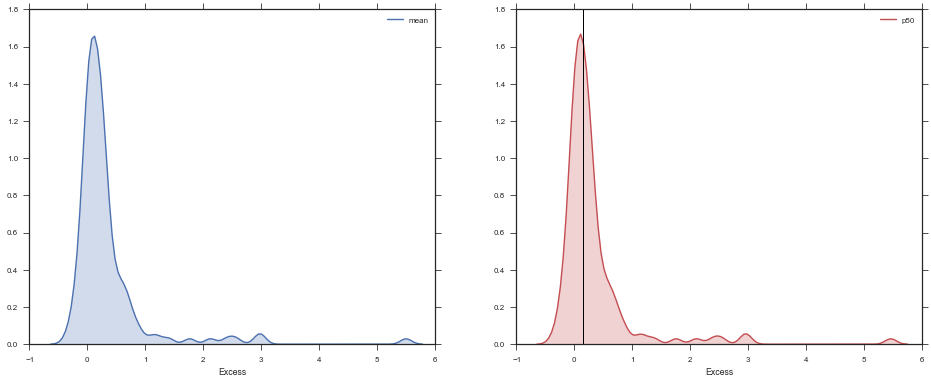

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.kdeplot(excess500['mean'][excess500['mean'] < 50], color=blue, shade=True, ax=ax1)
ax1.set_xlabel('Excess')
sns.kdeplot(excess500['p50'], color=red, shade=True, ax=ax2)
ax2.axvline(0.15246518858, color='k', lw=1)
ax2.set_xlabel('Excess')

For the mean to make the graph more readable I had to limit the excess measurement to be less than 50.

In both plots we can see that the distribution of excess has a long tail towards high values and the main part is centered around 0. This indicates that the model we used correctly predicted the 500 micron flux for most of our sources. 

In [88]:
mean_xs500, med_xs500, sd_xs500 = sigma_clipped_stats(excess500['p50'])
print 'Median 500 micron excess: ', med_xs500

Median 500 micron excess:  0.144386597227


So in a typical source the two temperature model underpredicted the observed 500 micron flux by approximately 15%. I show this value in the KDE plot as the black line. 

Lets take a look at the sources that have an excess that is above a certain threshold. Lets start with 1.0.

In [66]:
excess500['p50'][excess500['p50'] > 1.0]

2MASXJ03342453-1513402    2.396450
2MASXJ03534246+3714077    1.099020
2MASXJ23272195+1524375    2.539588
3C111.0                   1.379941
3C120                     2.928047
HB890241+622              5.461148
LCRSB034324.7-394349      1.196105
PICTORA                   1.756694
PKS2331-240               2.105962
UGC08327NED02             2.990746
Name: p50, dtype: float64

In [67]:
excess500['p50'][excess500['p50'] > 0.5]

2MASXJ01073963-1139117    0.548976
2MASXJ03342453-1513402    2.396450
2MASXJ03534246+3714077    1.099020
2MASXJ23272195+1524375    2.539588
3C111.0                   1.379941
3C120                     2.928047
6dFJ0626586-370559        0.898252
CGCG341-006               0.694292
CGCG468-002NED01          0.563158
ESO157-G023               0.640309
ESO383-18                 0.675977
Fairall272                0.794610
HB890241+622              5.461148
IC4329A                   0.500792
LCRSB034324.7-394349      1.196105
MCG+02-57-002             0.576044
Mrk198                    0.689579
Mrk3                      0.530019
Mrk975                    0.749857
NGC5106                   0.675941
NGC5231                   0.859051
PICTORA                   1.756694
PKS2331-240               2.105962
UGC07064                  0.594483
UGC08327NED02             2.990746
Name: p50, dtype: float64

Now lets plot the SPIRE color-color diagram with the colors of the markers according to their 500 micron excess measurement.

In [89]:
# Upload the herschel data
data_dir = '/Users/ttshimiz/Github/bat-data/'
bat_herschel = pd.read_csv(data_dir+'bat_herschel.csv', index_col=0)
h70 = bat_herschel['PACS70']
h160 = bat_herschel['PACS160']
h250 = bat_herschel['PSW']
h250_err = bat_herschel['PSW_err']
h250_flag = bat_herschel['PSW_flag']
h350 = bat_herschel['PMW']
h350_err = bat_herschel['PMW_err']
h350_flag = bat_herschel['PMW_flag']
h500 = bat_herschel['PLW']
h500_err = bat_herschel['PLW_err']
h500_flag = bat_herschel['PLW_flag']

excess500['PACS70'] = h70
excess500['PACS160'] = h160
excess500['PSW'] = h250
excess500['PMW'] = h350
excess500['PLW'] = h500
excess500['PSW_flag'] = h250_flag
excess500['PMW_flag'] = h350_flag
excess500['PLW_flag'] = h500_flag
excess500['F250/F350'] = excess500['PSW']/excess500['PMW']
#a = (h250/h350)[ind_bat]
excess500['F350/F500'] = excess500['PMW']/excess500['PLW']
#b = (h350/h500)[ind_bat]
#n = herschel_data.index[ind_bat].tolist()

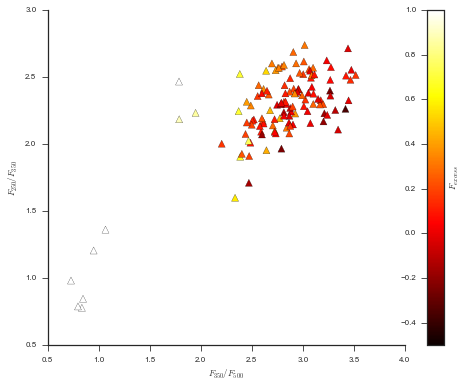

In [115]:
# Plot the SPIRE color-color diagram
fig1, ax1 = plt.subplots(1,1, figsize=(8, 6))
flag = ((excess500['PSW_flag'] == 'AD') |
        (excess500['PMW_flag'] == 'AD') |
        (excess500['PLW_flag'] == 'AD'))
#ax1.plot(excess500['F350/F500'][flag], excess500['F250/F350'][flag], marker='o', mec='r', mfc='None', ls='None', ms=10, mew=1.0)
#flag2 = ((excess500['PSW_flag'] == 'Ad') |
#        (excess500['PMW_flag'] == 'Ad') |
#        (excess500['PLW_flag'] == 'Ad'))
#ax1.plot(excess500['F350/F500'][~flag & flag2], excess500['F250/F350'][~flag & flag2], marker='s', mec='k', mfc='None', ls='None', ms=10, mew=1.0)
sc = ax1.scatter(excess500['F350/F500'][~flag], excess500['F250/F350'][~flag],
                 s=50, marker='^', c=excess500['p50'][~flag], vmin=-0.5, vmax=1.0, cmap='hot')
flag = ((excess500['PSW_flag'] == 'AD') |
        (excess500['PMW_flag'] == 'AD') |
        (excess500['PLW_flag'] == 'AD'))
#sc = ax1.scatter(b, a, s=50, marker='^')
ax1.set_xlabel('$F_{350}/F_{500}$')
ax1.set_ylabel('$F_{250}/F_{350}$')
ax1.set_xlim(0.5, 4.0)
ax1.set_ylim(0.5, 3.0)
cbar = fig1.colorbar(sc, ax=ax1)
cbar.set_label('$F_{excess}$')
sns.despine()
# Interactive features
#import mpld3
mpld3.enable_notebook()
#mpld3.disable_notebook()
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=excess500.index[~flag].tolist())
mpld3.plugins.connect(fig1, tooltip)

In [92]:
fig1.savefig('/Users/ttshimiz/Dropbox/Research/Thesis/SPIRE_photometry/Paper/Figures/color-color-excess.eps', bbox_inches='tight')

Its definitely clear from the above plot that the 500 micron excess is causing the offset of the sources from the main correlation between the SPIRE colors. However we still don't know what is causing the excess. Some of the sources though it is most likely due to nearby companion sources contaminating the photometry. I've indicated these sources with a red circle. Most of the biggest outliers in the upper lefthand corner are definitely due to the neighboring source. To try and determine what might be causing the excess for the rest of the sources, I'll look at the correlation between the 500 micron excess and various other indicators for the properties of the host galaxies.

The first obvious choice to look at is X-ray luminosity to see if possibly this is due to influence from the AGN. 

In [94]:
import astropy.units as u

# Upload the BAT fluxes and distances to calculate the 14-195 keV luminosity.
gen_info = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_info.csv', index_col=0)
bat_dat = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_bat_flux.csv', index_col=0)
dist = np.array(gen_info['Dist_[Mpc]'])*u.Mpc

# Convert to 14-195 keV luminosity
bat_dat['LBAT'] = 4*np.pi*(dist.to(u.cm).value)**2*bat_dat.BAT_flux

# Add to the excess500 DataFrame
excess500['LBAT'] = bat_dat['LBAT']
excess500['Dist'] = gen_info['Dist_[Mpc]']

Before looking at the relationship I want to define a function that will plot everything the way I want to without having to call the same lines of code every time.

In [17]:
def plot_relationship(df, keyx, keyy, logx=False, logy=False, exclude=None):

    blue, green, red, purple, yellow, cyan = sns.color_palette('deep')
    fig, ax = plt.subplots(1, 1)
    if exclude is not None:
        df = df[exclude]
    df_clean = df[[keyx, keyy]].dropna(axis=0)
    if (logx == False) & (logy == False):
        pp = ax.scatter(df_clean[keyx], df_clean[keyy], c=blue, s=60, alpha=0.75, edgecolor='white')
        ax.set_xlabel(keyx)
        ax.set_ylabel(keyy)
    elif logx & logy:
        pp = ax.scatter(np.log10(df_clean[keyx]), np.log10(df_clean[keyy]), c=blue, s=60, alpha=0.75, edgecolor='white')
        ax.set_xlabel('log '+keyx)
        ax.set_ylabel('log '+keyy)
    elif logx:
        pp = ax.scatter(np.log10(df_clean[keyx]), df_clean[keyy], c=blue, s=60, alpha=0.75, edgecolor='white')
        ax.set_xlabel('log '+keyx)
        ax.set_ylabel(keyy)
    elif logy:
        pp = ax.scatter(df_clean[keyx], np.log10(df_clean[keyy]), c=blue, s=60, alpha=0.75, edgecolor='white')
        ax.set_xlabel(keyx)
        ax.set_ylabel('log '+keyy)
    tooltip = mpld3.plugins.PointLabelTooltip(pp, labels=df_clean.index.tolist())
    mpld3.plugins.connect(fig, tooltip)
    
    return fig

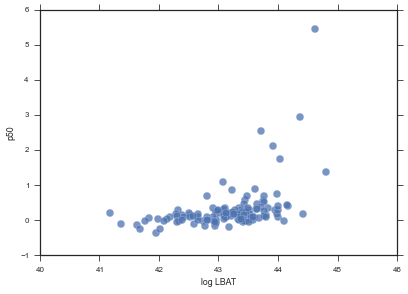

In [112]:
# Plot the relationship between X-ray luminosity and 500 micron excess
fig_lx = plot_relationship(excess500, 'LBAT', 'p50', logx=True, exclude=~flag)

In [113]:
scp_stats.pearsonr(excess500['p50'][~flag & (excess500['p50'] < 1)], excess500['LBAT'][~flag& (excess500['p50'] < 1)])

(0.30836756421905287, 0.00071825232907198142)

Hmmm, it looks like there could be somewhat of a correlation between the two, especially above log(LBAT) = 43. This wasn't really noticeable when just looking at the SPIRE color-color plot with the points colored by LBAT. The sources that have really high 500 micron excess are definitely radio loud sources like HB890241, PKS2331, PICTORA and 2MASXJ23272195.

We should also look at radio loudness as a potential cause for the 500 micron excess. Earlier investigations by me didn't seem to point to this as some of the sources within the main SPIRE color-color correlation were also radio loud. But lets take a look anyway. 

There are two radio-loudness parameters I want to try.
1. $L_{1.4\,GHz}/L_{X-ray}$
2. $L_{1.4\,GHz}/L_{160\,\mu m}$

For many of the sources we have the 1.4 GHz flux from either the NVSS or FIRST survey. However for some, mainly southern sources, we have 36 cm from the SUMSS survey and/or 5GHz fluxes from a literature search.

We want to convert all the radio data to 1.4 GHz luminosity so what I will do for the sources that don't have 1.4 GHz fluxes, I'll assume a spectral index of -0.7 and extrapolate from either 36 cm (preferred) or 5GHz.

Conversion to 1.4 GHz flux using assumption $F_{\nu} \propto \nu^{-0.7}$:

$F_{\nu_{1}}/F_{\nu_{2}} = (\nu_{1}/\nu_{2})^{-0.7}$

$F_{1.4\,GHz}/F_{5\,GHz} = (1.4\,GHz/5\,GHz)^{-0.7}$

$F_{1.4\,GHz}/F_{843\,MHz} = (1.4\,GHz/843\,MHz)^{-0.7}$

$F_{1.4\,GHz} = F_{5\,GHz}(1.4\,GHz/5\,GHz)^{-0.7}$

$F_{1.4\,GHz} = F_{843\,MHz}(1.4\,GHz/843\,MHz)^{-0.7}$


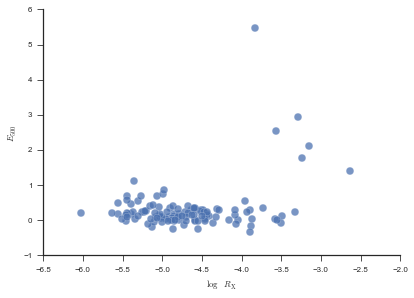

In [99]:
# Import the radio fluxes
direct = '/Users/ttshimiz/Github'
radio_1_4GHz = pd.read_csv(direct+'/bat-data/bat_20cm.csv', index_col=0)
radio_5GHz = pd.read_csv(direct+'/bat-data/bat_5GHz.csv', index_col=0)
radio_36cm = pd.read_csv(direct+'/bat-data/bat_sumss36cm.csv', index_col=0)

radio_5GHz['5GHz_to_20cm_flux'] = radio_5GHz['5GHz']*(1.4/5.0)**(-0.7)
radio_36cm['36cm_to_20cm_flux'] = radio_36cm.SUMSS_36cm*(1.4/0.843)**(-0.7)

data = excess500.join(radio_1_4GHz)
data = data.join(radio_36cm)
data = data.join(radio_5GHz)

# Calculate 1.4 GHz luminosity. Use actual 1.4 GHz fluxes first, then 843 MHz, then 5 GHz
data['L20cm'] = 4*np.pi*((np.array(data['Dist'])*u.Mpc).to(u.cm))**2*data['20cm_flux']*(1.4e9)*10**(-23)
a = pd.DataFrame({'L20cm':4*np.pi*((np.array(data['Dist'])*u.Mpc).to(u.cm).value)**2*data['36cm_to_20cm_flux']*(1.4e9)*10**(-23)})
b = pd.DataFrame({'L20cm':4*np.pi*((np.array(data['Dist'])*u.Mpc).to(u.cm).value)**2*data['5GHz_to_20cm_flux']*(1.4e9)*10**(-23)})
data = data.combine_first(a)
data = data.combine_first(b)

# Radio Loudness 1 = L20cm/LBAT
data['R1'] = data['L20cm']/data['LBAT']

# Radio Loudness 2 = L20cm/L160
l160 = 4*np.pi*(dist.to(u.cm).value)**2*(3e10/160e-4)*bat_herschel['PACS160']*10**(-23)
l70 = 4*np.pi*(dist.to(u.cm).value)**2*(3e10/160e-4)*bat_herschel['PACS70']*10**(-23)
data['L160'] = l160
data['R2'] = data['L20cm']/data['L160']

# Plot the relationship between R1 and 500 micron excess
fig_r1 = plot_relationship(data, 'R1', 'p50', logx=True, exclude=~flag)
fig_r1.gca().set_ylabel(r'$E_{500}$')
fig_r1.gca().set_xlabel(r'$\log\,\,R_{\rm X}$')
sns.despine()

In [101]:
scp_stats.spearmanr(data['p50'][~flag & (data['p50'] < 1)], data['R1'][~flag& (data['p50'] < 1)])

(-0.14719986812330471, 0.1132494518884158)

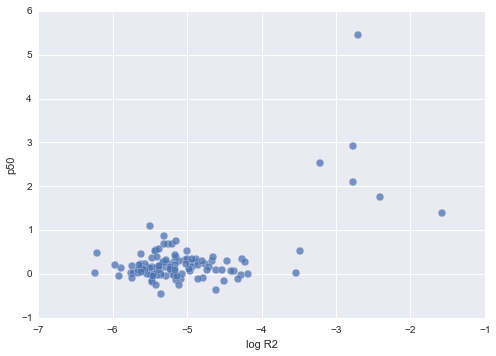

In [27]:
# Plot the relationship between R2 and 500 micron excess
fig_r2 = plot_relationship(data, 'R2', 'p50', logx=True, exclude=~flag)

In [100]:
scp_stats.spearmanr(data['p50'][~flag & (data['p50'] < 1)], data['R2'][~flag& (data['p50'] < 1)])

(0.11959567804103163, 0.19901918353675374)

There does not seem to be much of a relationship between the radio loudness and the 500 micron excess. Obviously some of the sources that have a 500 micron excess are very radio loud, but that doesn't seem to true for all of the sources. 

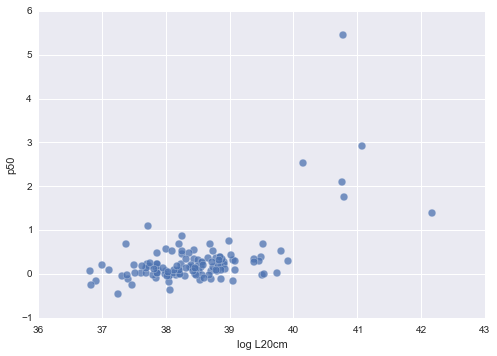

In [86]:
fig_r2 = plot_relationship(data, 'L20cm', 'p50', logx=True, exclude=~flag)

In [31]:
scp_stats.spearmanr(data['p50'][~flag & (data['p50'] < 1)], data['L20cm'][~flag& (data['p50'] < 1)])

(0.32204814129041448, 0.00035467947962333372)

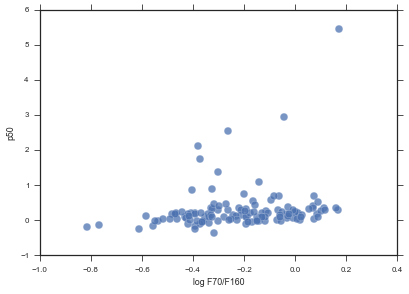

In [102]:
data['F70/F160'] = data['PACS70']/data['PACS160']
fig_r2 = plot_relationship(data, 'F70/F160', 'p50', logx=True, exclude=~flag)

In [103]:
scp_stats.spearmanr(data['p50'][~flag & (data['p50'] < 1)], data['F70/F160'][~flag& (data['p50'] < 1)])

(0.36324536558317971, 5.6902388253118794e-05)

The next indicator I want to test is the WISE Color: W1/W2.

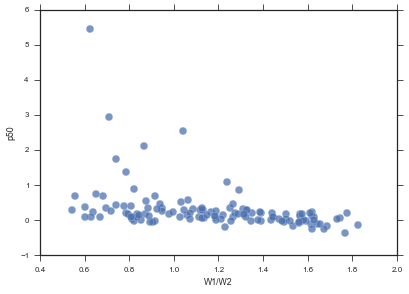

In [114]:
# Import the WISE data
wise_data = pd.read_csv(direct+'/bat-data/bat_wise.csv', index_col=0)
data['W1/W2'] = wise_data.W1/wise_data.W2
data['W3/BAT'] = wise_data.W3/bat_dat.BAT_flux

fig_wise = plot_relationship(data, 'W1/W2', 'p50', exclude=~flag)

In [105]:
scp_stats.spearmanr(data['p50'][~flag & (data['p50'] < 1.0)], data['W1/W2'][~flag & (data['p50'] < 1.0)])

(-0.48975707713288075, 2.0936967486864242e-08)

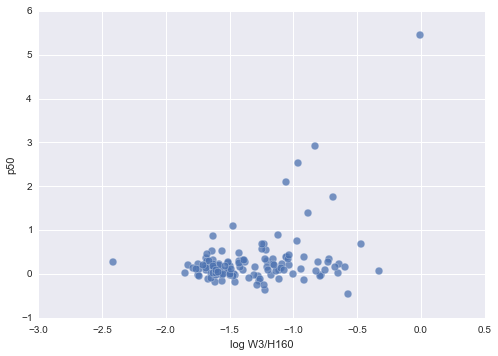

In [42]:
data['W3/H160'] = wise_data.W3/h160
fig_wise_pacs160 = plot_relationship(data, 'W3/H160', 'p50', logx=True, exclude=~flag)

In [43]:
scp_stats.spearmanr(data['p50'][~flag & (data['p50'] < 1)], data['W3/H160'][~flag& (data['p50'] < 1)])

(0.091190713573565008, 0.32397120608231234)

The last indicator I want to look at is the ratio of the AGN to star formation. For this I'll use LBAT for the AGN and L160 for star formation. But first I'll just look at the correlation with L160, an indicator for the strength of star formation.

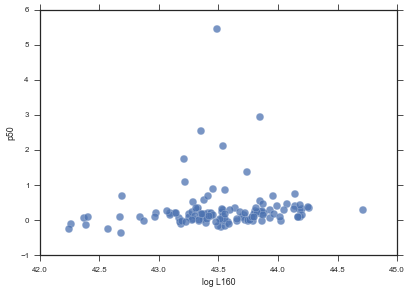

In [106]:
fig_sf = plot_relationship(data, 'L160', 'p50', logx=True, exclude=~flag)

In [107]:
scp_stats.pearsonr(data['p50'][~flag & (data['p50'] < 1)], data['L160'][~flag& (data['p50'] < 1)])

(0.25559101359080477, 0.005413991620801013)

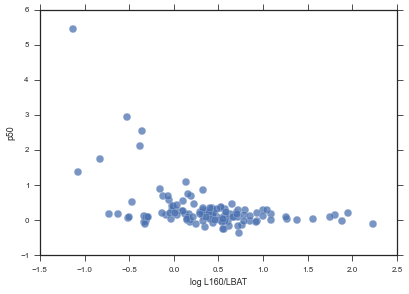

In [108]:
data['L160/LBAT'] = data.L160/data.LBAT
fig_agn_sf = plot_relationship(data, 'L160/LBAT', 'p50', logx=True, exclude=~flag)

In [109]:
scp_stats.pearsonr(data['p50'][~flag & (data['p50'] < 1)], data['L160/LBAT'][~flag& (data['p50'] < 1)])

(-0.15916813593574849, 0.08650531787671302)

This seems to work really well in explaining the 500 micron excess. Higher excess is correlated with lower ratio of L160/LBAT meaning star formation weaker given an AGN strength. So the next question then is why does this cause a 500 micron excess??

One idea Richard and Alberto have is that its related to the strength of the bremmstrahlung emission. We can test this using the strength of the OIII emission. So I've downloaded the entire OSSY database which was a spectral analysis of all of the galaxies in SDSS DR7 using GANDALF. OSSY only identifies each object by their SDSS ID so I've used CASJOBS (http://skyserver.sdss.org/casjobs/) to query the DR7 database to find all of the BAT AGN that are in SDSS and grab their SDSS ID. The IDs are saved in /Users/ttshimiz/Github/bat-data/BAT_sdss_DR7.csv. So what I need to do for each object we have a 500 micron excess is to pull its SDSS ID if there is one, then see if its in OSSY database. If it is we can pull out its OIII flux and plot it against the 500 micron excess.

In [20]:
# Import the OSSY database
import astropy.io.fits as pyf
ossy_file = '/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/OSSY/OSSY_emission_flux_errors.fits'
ossy_data = pyf.getdata(ossy_file)

In [21]:
ossy_data.dtype

dtype([('SDSS_ID', 'S18'), ('VEL_BALMER', '>f8'), ('VEL_BALMER_E', '>f8'), ('VEL_FORBIDDEN', '>f8'), ('VEL_FORBIDDEN_E', '>f8'), ('SIG_BALMER', '>f8'), ('SIG_BALMER_E', '>f8'), ('SIG_FORBIDDEN', '>f8'), ('SIG_FORBIDDEN_E', '>f8'), ('EBV_STAR', '>f8'), ('EBV_GAS', '>f8'), ('E_EBV_STAR', '>f8'), ('E_EBV_GAS', '>f8'), ('VEL_STARS', '>f8'), ('VEL_STARS_E', '>f8'), ('SIGMA_STARS', '>f8'), ('SIGMA_STARS_E', '>f8'), ('HEII_3203', '>f8'), ('NEV_3345', '>f8'), ('NEV_3425', '>f8'), ('OII_3726', '>f8'), ('OII_3728', '>f8'), ('NEIII_3868', '>f8'), ('NEIII_3967', '>f8'), ('H5_3889', '>f8'), ('HE_3970', '>f8'), ('HD_4101', '>f8'), ('HG_4340', '>f8'), ('OIII_4363', '>f8'), ('HEII_4685', '>f8'), ('ARIV_4711', '>f8'), ('ARIV_4740', '>f8'), ('HB_4861', '>f8'), ('OIII_4958', '>f8'), ('OIII_5006', '>f8'), ('NI_5197', '>f8'), ('NI_5200', '>f8'), ('HEI_5875', '>f8'), ('OI_6300', '>f8'), ('OI_6363', '>f8'), ('NII_6547', '>f8'), ('HA_6562', '>f8'), ('NII_6583', '>f8'), ('SII_6716', '>f8'), ('SII_6730', '>f8')

So the SDSS ID will be in the column called SDSS_ID and OIII flux will be in the column called OIII_5006.

In [22]:
# Import the BAT AGN SDSS IDs
bat_sdss = pd.read_csv('/Users/ttshimiz/Github/bat-data/BAT_sdss_DR7_ttshimiz.csv', index_col=0)
print(bat_sdss)

                                ra        dec               objid  distance  \
name                                                                          
2MASXJ01064523+0638015    16.68875   6.633889  587744044788875373  0.008992   
2MASXJ03305218+0538253    52.71750   5.640555  587741508080238773  0.010252   
2MASXJ07595347+2323241   119.97290  23.390000  587735236881154225  0.005778   
2MASXJ08032736+0841523   120.86420   8.697778  587745243615133959  0.006293   
2MASXJ09043699+5536025   136.15370  55.600830  588007005776642089  0.008169   
2MASXJ12005792+0648226   180.24130   6.806389  588017724398436382  0.007816   
2MASXJ14530794+2554327   223.28290  25.909170  587739457763016782  0.006006   
2MASXJ15064412+0351444   226.68370   3.862222  587726101489123546  0.006538   
2MASXJ23272195+1524375   351.84170  15.410280  587727223020716075  0.010032   
Ark120                    79.04750  -0.149722  758887369713844602  0.003532   
ARK347                   181.12370  20.316110  58802

In [23]:
# Create the OIII column in the data DataFrame
data['F[OIII]'] = pd.Series(index=data.index)

In [24]:
# Loop over the sources that have SDSS IDs and find their OIII fluxes
ossy_ids = ossy_data['SDSS_ID']
for src in bat_sdss.index.values:
    
    id  = str(long(bat_sdss.loc[src]['objid']))
    ind = np.where(ossy_ids == id)
    print src, id
    if len(ind[0]) != 0:
        data['F[OIII]'].loc[src] =  ossy_data['OIII_5006'][ind[0][0]]

2MASXJ01064523+0638015 587744044788875392
2MASXJ03305218+0538253 587741508080238720
2MASXJ07595347+2323241 587735236881154176
2MASXJ08032736+0841523 587745243615133952
2MASXJ09043699+5536025 588007005776642048
2MASXJ12005792+0648226 588017724398436352
2MASXJ14530794+2554327 587739457763016832
2MASXJ15064412+0351444 587726101489123584
2MASXJ23272195+1524375 587727223020716032
Ark120 758887369713844608
ARK347 588023669707440128
ARP151 587733080809668608
CGCG102-048 587742551748771840
CGCG122-055 587741489825775744
CGCG300-062 587730843136426112
CGCG312-012 587737825146437632
CGCG319-007 587739862020849664
Fairall272 758884775014695168
IC0486 587732156852797440
IC2461 587734622172610816
IC2637 587734892748144640
IC2921 587732772125278208
IRAS05078+1626 758884539333476480
KAZ320 758883880052785280
KUG1141+371 587738616491016192
KUG1208+386 587738618103922688
LEDA170194 587745545875292288
MCG+00-09-042 587731514229719168
MCG+01-57-016 758880764063776896
MCG+02-21-013 587742010042744960
MCG+

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Hmm it looks like there is only one BAT AGN in the OSSY database for some reason. I don't know if this is because I have the wrong SDSS ID or what but I need to find another way to get OIII fluxes. 

I used CASJOBS to query the MPA-JHU DR7 database where they also fit the SDSS spectra. From the query I already get the OIII fluxes for the 62 AGN that are in both samples. They are located in /Users/ttshimiz/Github/bat-data/BAT_sdss_galspecline.csv

In [25]:
bat_lines = pd.read_csv('/Users/ttshimiz/Github/bat-data/BAT_sdss_galspecline.csv', index_col=0)
bat_lines

,ra,dec,objid,distance,specobjid,Column1,sigma_balmer,sigma_balmer_err,sigma_forbidden,sigma_forbidden_err,...,oii_flux,oii_flux_err,oii_voff,oii_chi2,oiii_sigma,oiii_flux,oiii_flux_err,oiii_voff,oiii_chi2,spectofiber
name,,,,,,,,,,,,,,,,,,,,,
2MASXJ07595347+2323241,119.97290,23.390000,1237660958106059157,0.004740,1423288710513846272,1423288710513846272,171.98780,3.047491,147.38070,1.480817,...,381.93770,191.484600,-99.900590,0.811320,149.30850,1132.3870,14.709580,-61.713750,16.559510,0.783718
2MASXJ08032736+0841523,120.86420,8.697778,1237671262266917178,0.006718,2723574758959507456,2723574758959507456,500.00000,0.000000,244.09480,1.241146,...,935.17930,1049.779000,0.840547,2.963312,241.04950,2582.9310,16.296640,20.675590,65.395970,0.596741
2MASXJ09043699+5536025,136.15370,55.600830,1237651252024836118,0.008714,506783907828492288,506783907828492288,500.00000,0.000000,124.47520,0.563354,...,1196.13700,35.370190,-31.712730,2.425475,118.68850,2019.1530,11.267100,-26.900710,107.992000,0.794312
2MASXJ12005792+0648226,180.24130,6.806389,1237671140947591227,0.008776,1826211080079173632,1826211080079173632,124.81390,1.819600,141.29390,1.533941,...,468.23210,57.942210,86.053590,0.605277,150.56510,982.8768,13.417710,-47.352810,2.572581,0.796925
2MASXJ14530794+2554327,223.28290,25.909170,1237665178987921464,0.006390,2415105398622152704,2415105398622152704,500.00000,0.000000,305.55470,5.267460,...,137.29920,1046.264000,155.012600,1.189486,221.00340,497.9872,8.869794,49.019630,3.894761,0.456186
2MASXJ23272195+1524375,351.84170,15.410280,1237652944245620778,0.010143,840033793115973632,840033793115973632,412.69760,7.251653,194.59510,1.305944,...,562.69320,55.986190,56.635940,1.251560,208.17970,2110.7880,16.781040,-6.108122,67.949780,0.724053
ARK347,181.12370,20.316110,1237667915955634219,0.013692,2936499589345208320,2936499589345208320,185.59830,1.144746,162.78340,0.438543,...,0.00000,1.054063,34.378940,-3.301333,161.57530,10083.8800,51.512100,25.845720,146.601900,0.745335
ARP151,171.40080,54.382500,1237658802034573341,0.007032,1141745564082268160,1141745564082268160,500.00000,0.000000,116.67800,0.903444,...,0.00000,0.923612,-17.192100,2.171668,109.29240,2822.9700,25.968900,-28.442240,32.028370,0.653092
CGCG102-048,206.06540,19.566670,1237668272973676598,0.008757,2974786504309630976,2974786504309630976,161.27750,4.421649,168.36440,2.650766,...,369.85090,65.111470,47.649900,0.719838,191.51450,289.7108,9.018906,11.856140,1.047082,0.766360


In [26]:
data['F[OIII]'] = bat_lines['oiii_flux']
data['F[OIII]']

2MASXJ07595347+2323241     1132.3870
2MASXJ10402231-4625264           NaN
2MASXJ12005792+0648226      982.8768
2MASXJ12313717-4758019           NaN
2MASXJ15115979-2119015           NaN
2MASXJ19373299-0613046           NaN
2MASXJ21355399+4728217           NaN
2MASXJ23272195+1524375     2110.7880
2MFGC02280                       NaN
3C111.0                          NaN
3C120                            NaN
6dFJ0626586-370559               NaN
Ark120                           NaN
CGCG341-006                      NaN
CGCG468-002NED01                 NaN
CenA                             NaN
ESO005-G004                      NaN
ESO033-G002                      NaN
ESO137-34                        NaN
ESO139-G012                      NaN
ESO157-G023                      NaN
ESO197-G027                      NaN
ESO244-IG030                     NaN
ESO297-018                       NaN
ESO323-077                       NaN
ESO362-18                        NaN
ESO374-G044                      NaN
E

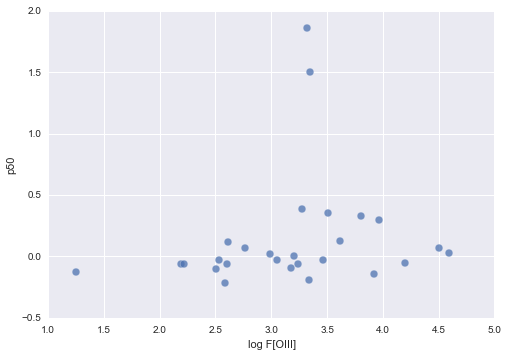

In [27]:
# plot the relationship between OIII flux and 500 micron excess
fig_oiii = plot_relationship(data, 'F[OIII]', 'p50', logx=True)

Not much to see here. We don't have many objects that have both an OIII measurement and a 500 micron excess measurement. And there doesn't seem to be any relationship between the two given the 27 objects that do have one.

5/18/15: I talked to Mike Koss who has been working on analyzing optical spectra for nearly 700 BAT AGN and he sent me a spreadsheet of OIII fluxes that is much more complete than the ones I found in the SDSS databases. I've saved all of the OIII fluxes in /Users/ttshimiz/Github/bat-data/bat_oiii_fluxes.csv. The first column is the name of the sources and the second column is the flux in units of 10^-15 ergs/s/cm^2. I need to convert these to an OIII luminosity and plot them against the 500 micron excess.

In [112]:
bat_oiii = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_oiii_flux.csv', index_col=0)
data['F[OIII]_Koss'] = np.abs(bat_oiii['Flux_OIII'])

In [113]:
data['L[OIII]_Koss'] = 4*np.pi*((np.array(data['Dist'])*u.Mpc).to(u.cm).value)**2*data['F[OIII]_Koss']*10**(-15)

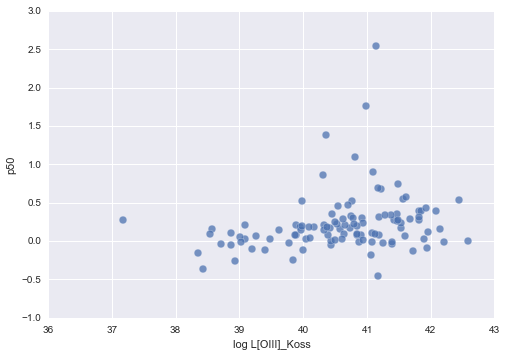

In [114]:
fig_oiii = plot_relationship(data, 'L[OIII]_Koss', 'p50', logx=True, exclude=~flag)

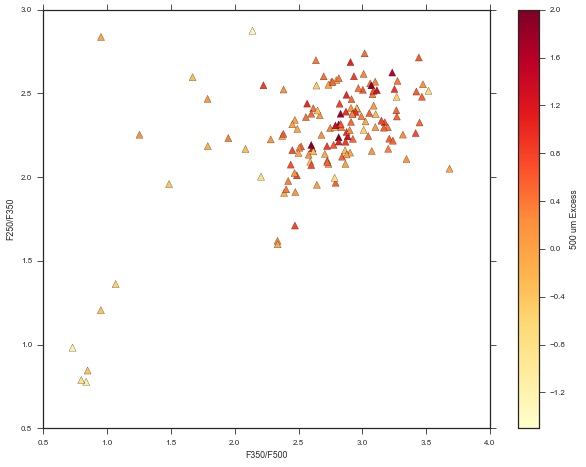

In [111]:
# Plot the SPIRE color-color diagram
fig1, ax1 = plt.subplots(1,1, figsize=(10, 7.5))
sc = ax1.scatter(data['F350/F500'], data['F250/F350'], c=np.log10(data['L160/LBAT']),
                s=50, marker='^', cmap = 'YlOrRd', vmax=-1.5, vmin=2.0)
ax1.set_xlabel('F350/F500')
ax1.set_ylabel('F250/F350')
cbar = fig1.colorbar(sc, ax=ax1)
cbar.set_label('500 um Excess')

mpld3.enable_notebook()
tooltip = mpld3.plugins.PointLabelTooltip(sc, labels=data.index.tolist())
mpld3.plugins.connect(fig1, tooltip)